In [2144]:
!pip install rfpimp

In [2145]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import operator
import pickle

In [2146]:
import rfpimp

# Load cleaned data

In [2147]:
df = pd.read_csv("../data/clean/clean.csv", sep=',')

# Show little overview of the data

In [2148]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2149]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [2150]:
df.shape

(41176, 21)

# Encoding categorical data

In [2151]:
categorical_columns = [
#    'age', 
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact',
    'month', 
    'day_of_week', 
#    'duration', 
#    'campaign', 
#    'pdays',
#    'previous', 
    'poutcome', 
#    'emp.var.rate', 
#    'cons.price.idx',
#    'cons.conf.idx', 
#    'euribor3m', 
#    'nr.employed',
#    'y'
]

In [2152]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Set datatype of ordinal/nominal variables to category**

In [2153]:
for col in categorical_columns:
    df[col] = df[col].astype('category') # set specific columns to "category", since get_dummies() will convert those columns into dummy/indicator variables (see below)

In [2154]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [2155]:
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

**Drop columns which are not (that) relevant for the prediction or which should be excluded**

In [2156]:
#df = df.drop("job", axis=1)
df = df.drop("default", axis=1)
#df = df.drop("contact", axis=1)
df = df.drop("month", axis=1)
df = df.drop("day_of_week", axis=1)
#df = df.drop("duration", axis=1) # Depending on how the prediction model is used, it may be recommended to drop this column.
                                  # I am interested in predicting the value of the column "y" even when knowing the length of the call stored in the column "duration".
                                  # Thus, the column "duration" will not be dropped.

if False:
    # drop columns in bulk mode
    df = df.drop([
#        'age', # good feature for prediction
#        'job', 
#        'marital', 
#        'education', 
        'default', 
#        'housing', 
#        'loan',
#        'contact', # good feature for prediction
        'month', 
        'day_of_week', 
#        'duration',
#        'campaign', # good feature for prediction
#        'pdays',
#        'previous', 
#        'poutcome', 
#        'emp.var.rate', 
#        'cons.price.idx',
#        'cons.conf.idx', 
#        'euribor3m', # good feature for prediction
#        'nr.employed', # good feature for prediction
#        'y' # must not be dropped
    ], axis=1)

**Create One Hot Encoding features for the categorical variables**

In [2157]:
df = pd.get_dummies(df, drop_first=True) # drop_first=True: removes the first column of that feature (so k-1 features are left)

In [2158]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,1,1,1,0,0


# Split input and output

In [2159]:
# X ... input, y ... output
X = df[df.columns[:-1]] # take all but not the last column ... input
y = df[df.columns[-1:]] # or: df[["y_yes"]] ... output

In [2160]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,1,0,0,0,1,0
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,0,1,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,1,0,0,0,1,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,0,1,0


In [2161]:
y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


# Check whether the data is balanced

In [2162]:
y_counts = y.y_yes.value_counts()
y_counts

0    36537
1     4639
Name: y_yes, dtype: int64

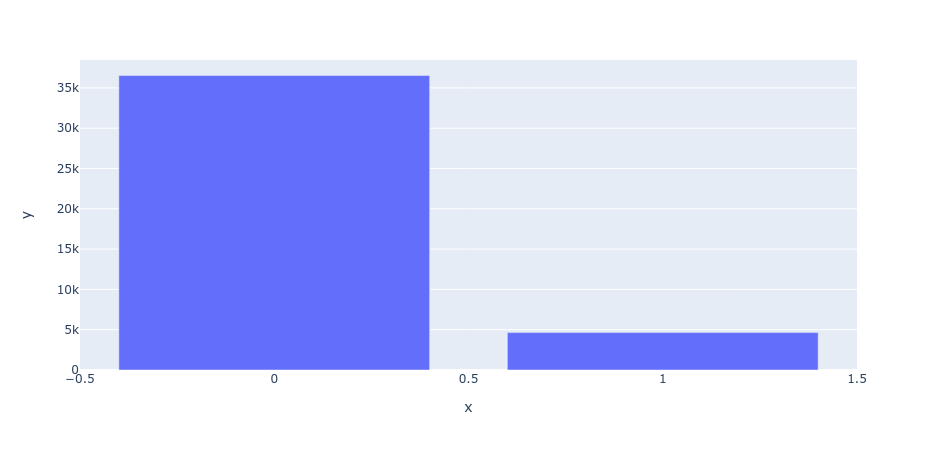

In [2163]:
px.bar(x=y_counts.index, y=y_counts.values)

**_Observation_: The given dataest is highly imbalanced in terms of the output, which should be predicted.**

# Optional: Create Decision Tree and calculate score

In [2164]:
dtc = DecisionTreeClassifier(class_weight="balanced") # define the model

In [2165]:
dtc.fit(X,y) # 1. input, 2. output variable

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [2166]:
if False: # if True: quite time consuming
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
    tree.plot_tree(dtc)
    fig.savefig('tree.png')

In [2167]:
dtc.score(X,y)

1.0

# Create train test split

In [2168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # input data, output data, proportion for the test (33%)

In [2169]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
2582,54,584,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,1,0,0,1,1,0
9407,45,124,3,999,0,1.4,94.465,-41.8,4.967,5228.1,...,1,0,0,0,0,0,0,1,1,0
28974,38,31,3,999,1,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,1,0,0,0,0,0
22704,58,155,5,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,0,0,0,0,1,0
30008,23,341,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,34,100,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,1,0
11284,29,120,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,1,0,0,1,1,0
38158,71,250,2,999,2,-3.4,92.431,-26.9,0.754,5017.5,...,0,0,0,0,0,0,0,0,0,0
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,1,0,0,1,0,0,1,1,0


In [2170]:
y_train

,y_yes
2582,0
9407,0
28974,0
22704,0
30008,1
...,...
6265,0
11284,0
38158,0
860,0


**Checking the ratio of 1s and 0s in the training set**

In [2171]:
number_of_1s = y_train.sum()
print("number of 1s (yes):", number_of_1s[0])
print("number of 0s (no):", y_train.size - number_of_1s[0])

number of 1s (yes): 3092
number of 0s (no): 24495


**_Observation:_ There are 0s and 1s contained, but they are imbalanced.**

# Save testing data for later usage

In [2172]:
pickle.dump(X_test, open('X.test', 'wb'))
pickle.dump(y_test, open('y.test', 'wb'))

# Optional: Upsample given imbalanced data in order to achieve better prediction results

In [2173]:
apply_upsampling = True

if apply_upsampling:
    print("in order to improve the prediction models, upsampling the imbalanced data gets performed...")
    
    # apply upsamply according to https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

    from sklearn.utils import resample

    # concatenate input data and output of training data back together
    train = pd.concat([X_train, y_train], axis=1)

    # separate minority and majority classes
    no = train[train.y_yes==0] # majority (no)
    yes = train[train.y_yes==1] # minority (yes)

    # upsample minority; note: only upsample the training data (not the testing data)
    yes_upsampled = resample(yes,
                             replace=True, # sample with replacement
                             n_samples=len(no), # match number in majority class
                             random_state=27) # reproducible results

    # combine majority (no) and upsampled minority (yes) to upsampled test data set
    upsampled = pd.concat([no, yes_upsampled])

    # check new y_yes counts (are balanced now)
    print("upsampled column 'y_yes' is now balanced:")
    print(upsampled.y_yes.value_counts())

    # again split new train set into input and output dataframes
    X_train = df[df.columns[:-1]] # take all but not the last column
    y_train = df[df.columns[-1:]] # or: df[["y_yes"]] ... output

    # create overall dataframe with combined test and upsampled training data for evaluation purposes
    X = X_train.append(X_test)
    y = y_train.append(y_test)

in order to improve the prediction models, upsampling the imbalanced data gets performed...
upsampled column 'y_yes' is now balanced:
1    24495
0    24495
Name: y_yes, dtype: int64


# Decision Tree (DT)

## Train DT

In [2174]:
dtc = DecisionTreeClassifier(class_weight="balanced")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Save DT classifier model for later usage

In [2175]:
pickle.dump(dtc, open('DecisionTreeClassifier.model', 'wb'))

## Evaluation of DT

In [2176]:
y_pred = dtc.predict(X_test) # use model to predict values

In [2177]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [2178]:
accuracy_score(y_test, y_pred)

1.0

In [2179]:
precision_score(y_test, y_pred)

1.0

In [2180]:
recall_score(y_test, y_pred)

1.0

In [2181]:
f1_score(y_test, y_pred) # seems good -> should be as close to 1 as possible

1.0

## K-Folds Cross Validation

In [2182]:
dtc = DecisionTreeClassifier(class_weight="balanced") # define model -> model is untrained
dtc_scores = cross_validate(dtc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1')) # cv ... cross-validation (or K-fold)

In [2183]:
dtc_scores

{'fit_time': array([0.23999834, 0.30356169, 0.23313332, 0.23158145, 0.30176425]),
 'score_time': array([0.01823568, 0.01924181, 0.01993847, 0.02139854, 0.02199531]),
 'test_accuracy': array([0.93116041, 0.91481786, 0.89263216, 0.84771296, 1.        ]),
 'test_average_precision': array([0.46444554, 0.39734288, 0.33986739, 0.35868433, 1.        ]),
 'test_recall': array([0.48746968, 0.52789006, 0.55295069, 0.82053355, 1.        ]),
 'test_f1': array([0.61530612, 0.58329611, 0.53773585, 0.54894538, 1.        ])}

# Random Forest (RF)

RF is resistant to overfitting.

## K-Folds Cross Validation

In [2184]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=None)

In [2185]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

k_fold = KFold(random_state=42, n_splits=5, shuffle=True)
sk_fold = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)

cv_strategy = sk_fold # possible options: 5|k_fold|sk_fold

rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=cv_strategy, scoring=('accuracy', 'average_precision', 'recall','f1')) # cv=4
rfc_scores

{'fit_time': array([4.03885603, 3.89707398, 3.79762769, 3.91168094, 3.93893814]),
 'score_time': array([0.37272835, 0.37593722, 0.39173031, 0.41894388, 0.37823892]),
 'test_accuracy': array([0.94640738, 0.94823336, 0.94622478, 0.94750297, 0.94604218]),
 'test_average_precision': array([0.83821719, 0.84528359, 0.83818373, 0.83967507, 0.8468132 ]),
 'test_recall': array([0.65804365, 0.67744543, 0.66531932, 0.68310428, 0.66235864]),
 'test_f1': array([0.73498871, 0.74721355, 0.73646532, 0.74613687, 0.73509637])}

## Compare DT and RF Classifiers

In [2186]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvment'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [2187]:
report

,Decision Tree,Random Forest,Improvment
test_accuracy,40.7,94.7,54.0
test_average_precision,11.4,84.2,72.7
test_recall,33.9,66.9,33.1
test_f1,7.3,74.0,66.7


The Random Forest Classifier outperforms the Decision Tree Classifier.

Finally the scores of the Random Forest Classifier is quite good and can be used.

## Train RF

In [2188]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=None)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Determine feature importance

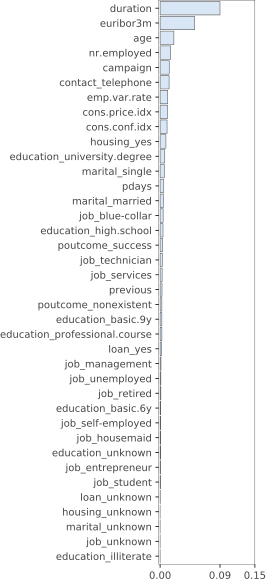

In [2189]:
importance = rfpimp.importances(rfc, X_test, y_test) # calculate importance! (feed it with the test set!)
rfpimp.plot_importances(importance)

The top ranked features are especially important for predicting the output.

## Save RF classifier model for later usage

In [2190]:
pickle.dump(rfc, open('RandomForestClassifier.model', 'wb'))

In [2191]:
y_test_rfc = rfc.predict(X_test)
y_test_rfc

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

## Final remarks
In order to further improve the scores of the subsequently used classifiers, other or additional techniques exists for tackling imbalanced datasets, like:

- Using different algorithms or classifiers (probably also using Neural Networks)
- Trying to undersample the majority class
- Generate synthetic samples
- ...